In [24]:
import numpy as np
#zad1 
#fourier dyskretny
def DFT_slow(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)
#fourier  dyskretny odwrotny
def IDFT_slow(x):
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N)
    return np.dot(M, x)

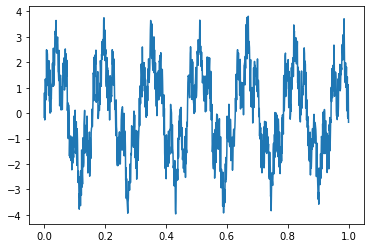

In [25]:
import matplotlib.pyplot as plt
Ts = 1
samples = 1024
x = np.linspace(0, Ts, samples)
y = np.loadtxt('setf1.csv')
plt.plot(x,y)

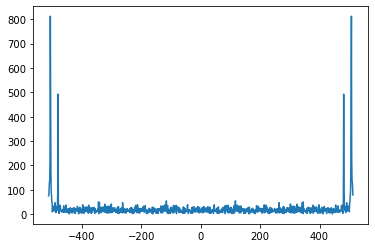

In [29]:
four_s = samples/Ts

x_fourier = np.linspace(-four_s/2, four_s/2, samples)
y_fourier = DFT_slow(y)
plt.plot(x_fourier, abs(y_fourier))

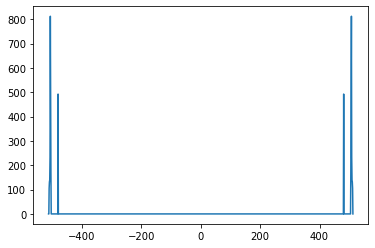

In [40]:
y_fourier1 = np.copy(y_fourier)
y_fourier1[abs(y_fourier)<100]=0
plt.plot(x_fourier, abs(y_fourier1))

C:\Users\kinAtrA\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


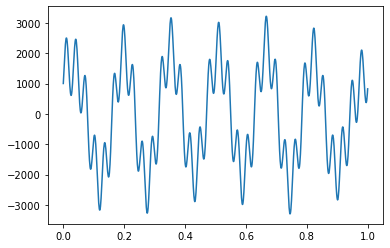

In [41]:
yl = IDFT_slow(y_fourier1)
plt.plot(x, yl)

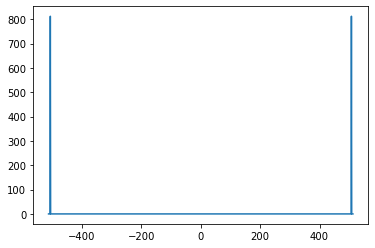

In [56]:
y_fourier2 = np.copy(y_fourier)
y_fourier2[abs(y_fourier)>1000] = 0
y_fourier2[abs(y_fourier)<600] = 0
y_fourier = DFT_slow(y)
plt.plot(x_fourier, abs(y_fourier2))

C:\Users\kinAtrA\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


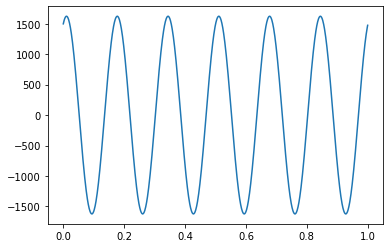

In [57]:
y2 = IDFT_slow(y_fourier2)
plt.plot(x, y2)

In [53]:

print('moc calego sygnalu dziedzina czasu:', samples*sum(y**2), '\nmoc calego sygnalu dziedzina czestotliwosci:', sum(abs(y_fourier)**2),'\nmoc skladowej 1 dziedzina czestotliwosci:', sum(abs(y_fourier1)**2),'\nmoc skladowej 2 dziedzina częstotliwosci:', sum(abs(y_fourier2)**2))
print('moc szumu dziedzina częstotliwosci:', sum(abs(y_fourier)**2) - sum(abs(y_fourier1)**2) - sum(abs(y_fourier2)**2))
print('procentowa moc szumu:', 100*(sum(abs(y_fourier)**2) - sum(abs(y_fourier1)**2) - sum(abs(y_fourier2)**2))/(sum(abs(y_fourier)**2)))
print('procentowa moc skladowej 1:', 100*(sum(abs(y_fourier1)**2)/sum(abs(y_fourier)**2)))
print('procentowa moc skladowej 2:', 100*(sum(abs(y_fourier2)**2)/sum(abs(y_fourier)**2)))

moc calego sygnalu dziedzina czasu: 2996865.538068305 
moc calego sygnalu dziedzina czestotliwosci: 2996865.5380683835 
moc skladowej 1 dziedzina czestotliwosci: 2553520.758204664 
moc skladowej 2 dziedzina częstotliwosci: 2292197.304360171
moc szumu dziedzina częstotliwosci: -1848852.5244964515
procentowa moc szumu: -61.692875473089174
procentowa moc skladowej 1: 85.20638399581067
procentowa moc skladowej 2: 76.4864914772785


Obcinanie


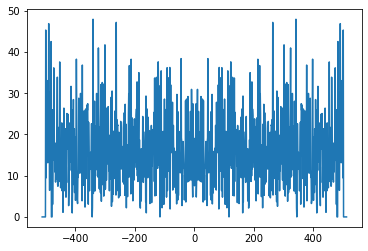

In [58]:
print('Obcinanie')
yfn = np.copy(y_fourier)
yfn[abs(y_fourier)>50]=0
plt.plot(x_fourier, abs(yfn))

C:\Users\kinAtrA\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Szum')

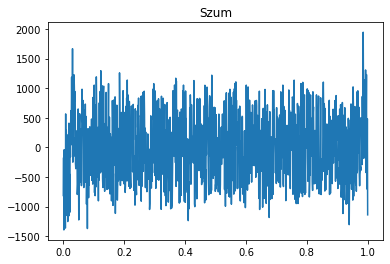

In [59]:
yn = IDFT_slow(yfn)
plt.plot(x, yn)
plt.title('Szum')